# 反向传播算法

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['SimHei']# ['Noto Sans CJK JP']
matplotlib.rcParams['axes.unicode_minus']=False 

%matplotlib inline

## 激活函数的导数
---
### sigmod函数的导数

$$ Sigmoid(x) = \sigma(x)= \frac {1} {1+e^{-x}}$$
导数:
$$\frac d {dx} g(x) = \frac {-1} {(1+e^{-x})^2} \frac{d e^{-x}} {dx} = {\frac{1}{1 + e^{-x}} (1-\frac{1}{1 + e^{-x}})}=g(x)(1-g(x))$$

注：

当$z$ = 10或$z= -10$ ; $\frac{d}{dz}g(z)\approx0$

当$z ​$= 0 , $\frac{d}{dz}g(z)\text{=g(z)(1-g(z))=}{1}/{4}​$

在神经网络中$a= g(z)$; $g{{(z)}^{'}}=\frac{d}{dz}g(z)=a(1-a)$
一些其他性质:
$$
\sigma(x) = \frac {exp(x)}{exp(x) + exp(0)} \\
1 - \sigma(x) = \sigma(-x)
$$

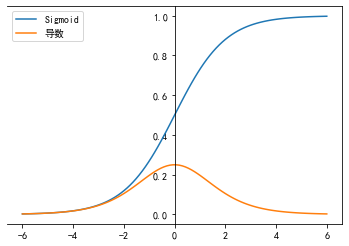

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

x = np.linspace(-6, 6, 100)

plt.figure()
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, derivative(x), label='导数')
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
plt.legend()
plt.show()

### ReLU

$$Relu(x) = max(0, x)$$

导数:
$$
g(z)^{'}=
  \begin{cases}
  0&	\text{if z < 0}\\
  1&	\text{if z > 0}\\
undefined&	\text{if z = 0}
\end{cases}
$$

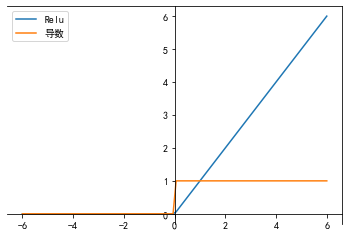

In [27]:
def relu(x):
    return np.where(x>0, x, 0)


def derivative(x):
    d = np.array(x, copy=True)
    d[x<0] = 0
    d[x>=0] = 1
    return d

x = np.linspace(-6, 6, 100)

plt.figure()
plt.plot(x, relu(x), label='Relu')
plt.plot(x, derivative(x), label='导数')
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.legend()
plt.show()

### Leaky ReLU

$$Leaky Relu(x) = max(px, x)$$
导数:
$$
g(z)^{'}=
\begin{cases}
p& 	\text{if z < 0}\\
1&	\text{if z > 0}\\
undefined&	\text{if z = 0}
\end{cases}
$$

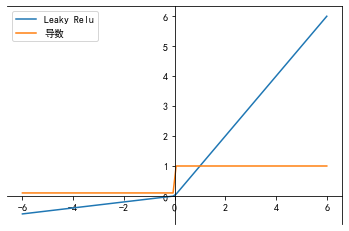

In [30]:
def leaky_relu(x, p=0.02):
    return np.where(x>0, x, p*x)


def derivative(x, p):
    dx = np.ones_like(x)
    dx[x<0] = p
    return dx

x = np.linspace(-6, 6, 100)
plt.figure()
p = 0.1
plt.plot(x, leaky_relu(x, p), label='Leaky Relu')
plt.plot(x, derivative(x, p), label='导数')
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.legend()
plt.show()

### Tanh
$$
tanh(x) = \frac {e^x - e^{-x}} {e^x + e^{-x}} = 2 \cdot sigmoid(2x) - 1
$$

导数:
$$\frac{d}{{d}z}g(z) = \frac {4e^z e^{-z}}{(e^z + e^{-z})^2}  =  1 - (tanh(z))^{2}$$

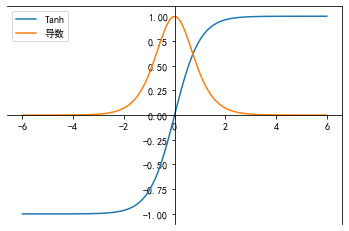

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return 2 * sigmoid(2*x) - 1

def derivative(x):
    return 1 - tanh(x) ** 2

x = np.linspace(-6, 6, 100)

plt.figure()
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, derivative(x), label='导数')
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.legend()
plt.show()

## 损失函数的梯度
---
### MSE函数梯度
均方差误差损失函数:
$$
L = \frac 1 2 \sum_{k=1}^K (y_k - o_k)^2
$$
梯度:
$$
\frac {\partial L} {\partial {o_i}} = \frac 1 2 \sum_{k=1}^K \frac {\partial}{\partial o_i}  (y_k - o_k)^2 \\ 
= \frac 1 2 \sum_{k=1}^K 2 \cdot (y_k - o_k) \cdot \frac {\partial (y_k - o_k)}{\partial o_i} \\
= \sum_{k=1}^K (o_k - y_k)\cdot \frac {\partial o_k} {\partial o_i}
$$

可见, $\frac {\partial L} {\partial {o_i}}$仅当k=i时为1, 其它点都为0, 也就是说,偏导数$\frac {\partial L} {\partial {o_i}}$只与第i号节点相关, 与其他节点无关, 所以写成:
$$
\frac {\partial L} {\partial {o_i}} = (o_i - y_i)
$$

### 交叉熵函数梯度
**Softmax函数梯度**
$$
p_i = \frac {e^{z_i}}{\sum_{k=1}^K e^{z_k}}
$$
它的功能是将𝐾个输出节点的值转换为概率，并保证概率之和为1.
- i = j时。Softmax 函数的偏导数:
$$
\frac {\partial p_i}{\partial z_j} = \frac {\partial \frac {e^{z_i}}{\sum_{k=1}^K e^{z_k}}}{ \partial z_j}
= \frac {e^{z_i} \sum_{k=1}^K e^{z_k}  - e^{z_j}e^{z_i} } {(\sum_{k=1}^K e^{z_k})^2}  \\ 
= \frac {e^{z_i} (\sum_{k=1}^K e^{z_k}  - e^{z_j})} {(\sum_{k=1}^K e^{z_k})^2}
= \frac {e^{z_i}} {\sum_{k=1}^K e^{z_k}} \times \frac {\sum_{k=1}^K e^{z_k}  - e^{z_j}} {\sum_{k=1}^K e^{z_k}}
$$
可以看到, 上式为$p_i$和$1-p_j$相乘, 当$i = j$时,
$$
\frac {\partial p_i}{\partial z_j} = p_i(1-p_j), i=j
$$
- $i \neq j$时,
$$
\frac {\partial p_i}{\partial z_j} = \frac {\partial \frac {e^{z_i}}{\sum_{k=1}^K e^{z_k}}}{ \partial z_j} 
= \frac { 0 - e^{z_j}e^{z_i} } {(\sum_{k=1}^K e^{z_k})^2} \\
= \frac {-e^{z_j}} {\sum_{k=1}^K e^{z_k}} \times \frac {e^{z_i}} {\sum_{k=1}^K e^{z_k}}
= - p_j \cdot p_i
$$

综上, Softmax函数的梯度表达式:
$$
\frac {\partial p_i}{\partial z_j} = \begin{cases}p_i(1-p_j), \quad i=j \\
-p_i\cdot p_j, \quad i \neq j
\end{cases}
$$

**交叉熵梯度**

交叉熵损失函数
$$
L = -\sum_k y_klog(p_k)
$$
这里直接来推导最终损失值L对网络输出logits 变量$z_i$的偏导数，展开为
$$
\frac {\partial L}{z_i} = -\sum_k y_k \frac {\partial log(p_k)}{\partial z_i}\\
=  -\sum_k y_k \frac {\partial log(p_k)}{\partial p_k}\cdot \frac {\partial p_k}{\partial z_i} \\
= -\sum_k y_k \frac 1 {p_k}\cdot \frac {\partial p_k}{\partial z_i}
$$
与上面的Softmax 处理类似, 将求和符号拆分为 𝑘 = 𝑖 以及𝑘 ≠ 𝑖的两种情况:
$$
\frac {\partial L}{z_i} = y_i \frac 1 {p_i} \cdot \frac {\partial p_i}{\partial z_i} + 
-\sum_{k\neq i} y_k \frac 1 {p_k}\cdot \frac {\partial p_k}{\partial z_i} \\
= -y_i(1-p_i) - \sum_{k\neq i} y_k \frac 1 {p_k}(-p_k \cdot p_i) \\
= p_i(y_i + \sum_{k\neq i} y_k)- y_i
$$
特别地，对于分类问题中标签𝑦通过One-hot 编码的方式，则有如下关系:
$$
\sum_{k} y_k = 1 \\
y_i + \sum_{k\neq i} y_k = 1
$$
所以交叉熵的偏导数可以进一步化简:
$$
\frac {\partial L}{z_i} = p_i - y_i
$$

## 全连接层梯度
以全连接层网络、激活函数采用Sigmoid 函数、误差函数为Softmax+MSE 损失函数的神经网络为例，推导其梯度传播规律
### 单神经元梯度
对于采用Sigmoid 激活函数的神经元模型，它的数学模型可以写为：
$$
o^{(1)} = \sigma(w^{(1)^T} x + b^{(1)})
$$
其中变量的上标表示层数, $o^{(1)}$表示第一层的输出
![](./单神经元梯度.png)

如果我们采用均方误差函数，考虑到单个神经元只有一个输出$o_1^{(1)}$，那么损失可以表达为：
$$L = \frac 1 2 (o^{(1)}_1 - t)^2 = \frac 1 2 (o_1 - t)^2$$
以权值参数$w_{j1}$为例, 偏导数:

$$
\frac {\partial L}{\partial w_{j1}} = (o_1 - t)\frac {\partial o_1}{\partial w_{j1}} \\
= (o_1 - t) \frac {\partial \sigma(z_1)}{\partial z_{1}} \frac {\partial z^{(1)}_1}{\partial w_{j1}} \\
= (o_1 - t)\sigma(z_1)(1-\sigma(z_1))\frac {\partial z^{(1)}_1}{\partial w_{j1}} \\
= (o_1 - t)o_1(1 - o_1)\frac {\partial z^{(1)}_1}{\partial w_{j1}} \\
=  (o_1 - t)o_1(1 - o_1)x_{j}
$$
可见, 误差对权值$w_{j1}$的偏导只与输出值$o_1$, 真实值t以及当前权值连接的输入$x_j$有关

### 全连接层梯度
们把单个神经元模型推广到单层的全连接层的网络上
![](./全连接层梯度.png)

全连接层的均方差误差:
$$
L = \frac 1 2 \sum_{i=1}^K(o_i^{(1)} - t_i)^2
$$
对权值$w_{jk}$的偏导数只与输出节点$o_k^{(1)}$有关, 可以去除求和符号, 即$i = k$:
$$
\frac {\partial L} {\partial w_{jk}} = (o_k - t_k) \frac {\partial o_k}{ \partial w_{jk}} \\
= (o_k -t_k)o_k(1-o_k)\frac {\partial z_k}{\partial w_jk} \\
= (o_k -t_k)o_k(1-o_k)x_j
$$
令$\delta_k = (o_k -t_k)o_k(1-o_k)$, 则:
$$
\frac {\partial L} {\partial w_{jk}} = \delta_k x_j
$$